In [8]:
import pandas as pd


In [9]:
print("hello")

hello


In [10]:
out = pd.read_csv('build/tests/Release/result.csv')  
out.head()

,Test_name,size,time
0,nonStable_diag_CM,32,1852300
1,nonStable_diag_OCL,32,2999800


In [4]:
out = pd.read_csv('build/tests/Release/results.csv')  
out = out.drop(["iterations", "time_unit", "bytes_per_second", "items_per_second", "label","error_occurred", "error_message", "cpu_time"], axis =1 )
spill_res = out["name"].str.split("/")
names = ["type", "size"]
data = spill_res.to_list()
new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, out], axis=1)
res = res.drop("name", axis = 1)
res["size"]  = pd.to_numeric(res["size"])

In [5]:
res.dtypes

type          object
size           int64
real_time    float64
dtype: object

In [6]:
res

,type,size,real_time
0,nonStable_CM_diag,32,7974180.0
1,nonStable_CM_diag,64,7984680.0
2,nonStable_CM_diag,96,8040660.0
3,nonStable_CM_diag,128,8085460.0
4,nonStable_CM_diag,160,8055810.0
5,nonStable_CM_diag,192,8057900.0
6,nonStable_CM_diag,224,7915780.0
7,nonStable_CM_diag,256,7998810.0
8,nonStable_OCL_diag,32,1423090.0
9,nonStable_OCL_diag,64,1697980.0


In [7]:


nonStable_OCL_diag=res["type"] == "nonStable_OCL_diag"
nonStable_CM_diag  = res["type"] == "nonStable_CM_diag"
nonStable_CPU_diag  = res["type"] == "nonStable_CPU_diag"
#eigen = res["type"] == "Eigen"

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

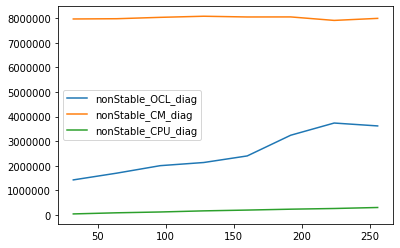

In [9]:
plt.plot(res[nonStable_OCL_diag]["size"], res[nonStable_OCL_diag]["real_time"],label='nonStable_OCL_diag')
plt.plot(res[nonStable_CM_diag]["size"], res[nonStable_CM_diag]["real_time"],label='nonStable_CM_diag')
plt.plot(res[nonStable_CPU_diag]["size"], res[nonStable_CPU_diag]["real_time"],label='nonStable_CPU_diag')
plt.legend()
plt.show()

In [10]:
mask = res["real_time"] < 1e8
res = res[mask]

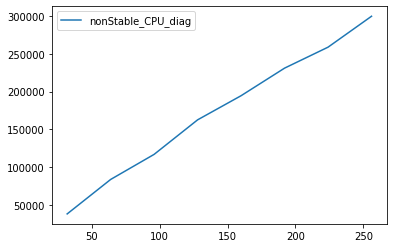

In [11]:
plt.plot(res[nonStable_CPU_diag]["size"], res[nonStable_CPU_diag]["real_time"],label='nonStable_CPU_diag')
plt.legend()
plt.show()